In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('train.csv')
data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

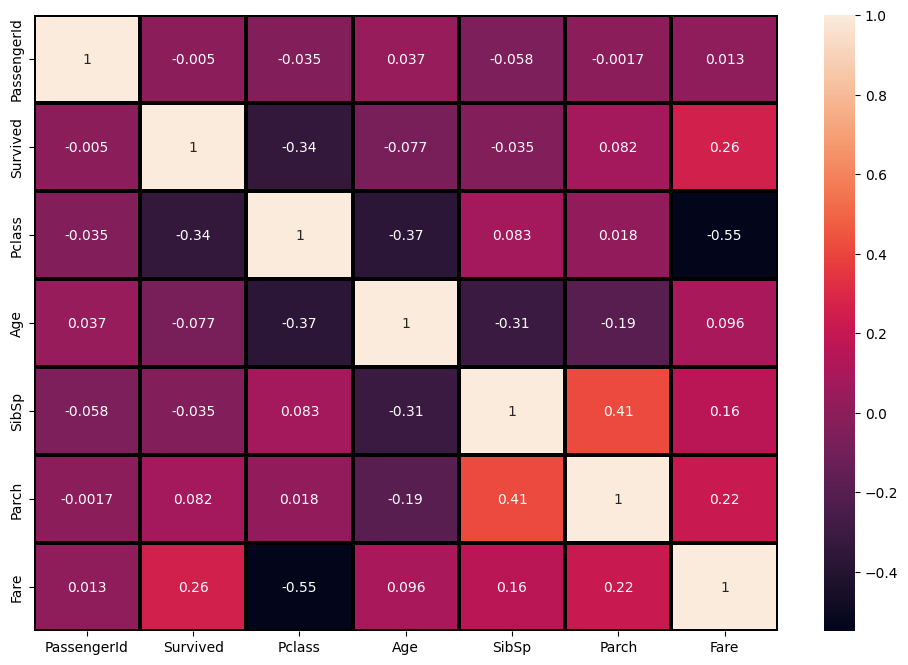

In [12]:
numeric_data = data.select_dtypes(include='number')
#The heatmap function is used to visualize the correlation matrix of the numeric data.
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=1.5, linecolor='black')
plt.show()


In [13]:
age_null_mask=data['Age'].isnull()

In [14]:
age_mean=data['Age'].mean()
age_std=data['Age'].std()

In [17]:
age_random=np.random.normal(loc=age_mean, scale=age_std, size=age_null_mask.sum())

In [19]:
data.loc[age_null_mask, 'Age']=age_random

In [20]:
age_random.size

177

In [21]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
637,638,0,2,"Collyer, Mr. Harvey",male,31.000000,1,1,C.A. 31921,26.2500,NaN,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.000000,1,0,PC 17758,108.9000,C65,C
358,359,1,3,"McGovern, Miss. Mary",female,33.847030,0,0,330931,7.8792,NaN,Q
555,556,0,1,"Wright, Mr. George",male,62.000000,0,0,113807,26.5500,NaN,S
454,455,0,3,"Peduzzi, Mr. Joseph",male,39.101454,0,0,A/5 2817,8.0500,NaN,S
817,818,0,2,"Mallet, Mr. Albert",male,31.000000,1,1,S.C./PARIS 2079,37.0042,NaN,C
464,465,0,3,"Maisner, Mr. Simon",male,35.369253,0,0,A/S 2816,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='Age'>

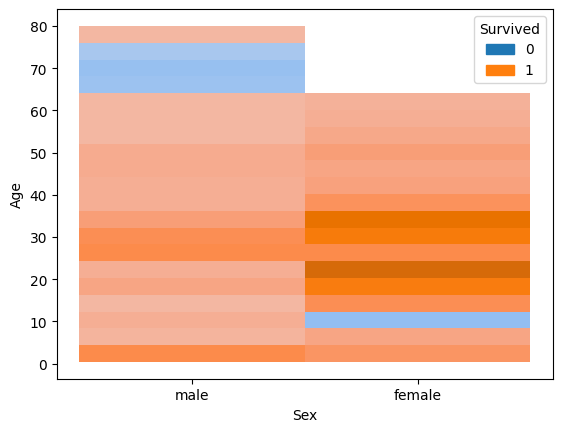

In [13]:
sns.histplot(x='Sex', y='Age', hue='Survived', data=data)

<Axes: xlabel='Sex', ylabel='Age'>

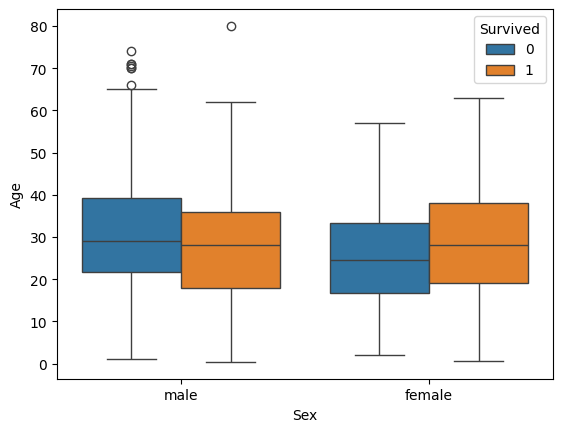

In [14]:
sns.boxplot(data=data, x='Sex', y='Age', hue='Survived')

In [17]:
q1=data['Age'].quantile(0.25)
q1

20.125

In [19]:
q3=data['Age'].quantile(0.75)
q3

38.0

In [20]:
iqr=q3-q1
iqr

17.875

In [21]:
lb=q1-1.5*iqr
lb

-6.6875

In [23]:
ub=q3+1.5*iqr
ub

64.8125

In [25]:
data=data[(data['Age'] < lb) & (data['Age']>ub)]

<Axes: xlabel='Sex', ylabel='Age'>

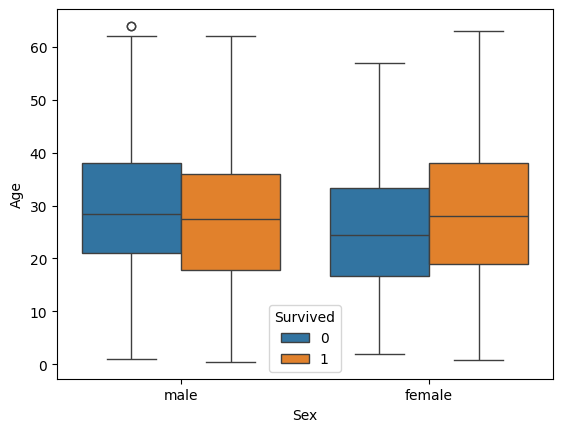

In [26]:
sns.boxplot(data=data, x='Sex', y='Age', hue='Survived')